# Evaluation


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Settings
ndb_eager_filepath = '/home/christopher/Workspace/statefun-ndb-benchmark/output-data/01-06-2022_12:19/ndb-lazy-3-workers-embedded-10000.json'

In [3]:
# Preprocessing
ndb_eager_df = pd.read_json(ndb_eager_filepath, lines=True)

initial_timestamp = ndb_eager_df["inputKafkaTimestamp"].min()
ndb_eager_df["latency"] = ndb_eager_df["outputKafkaTimestamp"] - ndb_eager_df["inputKafkaTimestamp"]
# Start time of event in seconds, counted from initial event, convert to int to create 1 second buckets
ndb_eager_df["startTimeBucket"] = ((ndb_eager_df["inputKafkaTimestamp"] - initial_timestamp)/1000).astype(int)
ndb_eager_df["endTimeBucket"] = ((ndb_eager_df["outputKafkaTimestamp"] - initial_timestamp)/1000).astype(int)
ndb_eager_df["startTimeBucketTen"] = (ndb_eager_df["startTimeBucket"]/10)*10
ndb_eager_df["endTimeBucketTen"] = (ndb_eager_df["endTimeBucket"]/10)*10


In [4]:
pd.set_option('float_format', '{:f}'.format)
print("NDB EAGER: " + str(ndb_eager_df[ndb_eager_df["startTimeBucket"] < 450]["latency"].mean()))

print("NDB EAGER: " + str(len(ndb_eager_df[ndb_eager_df["startTimeBucket"] < 450].index)/450))



NDB EAGER: 326.24359369718246
NDB EAGER: 8993.226666666667


In [5]:
# Plot styling
plt.style.use('ggplot')

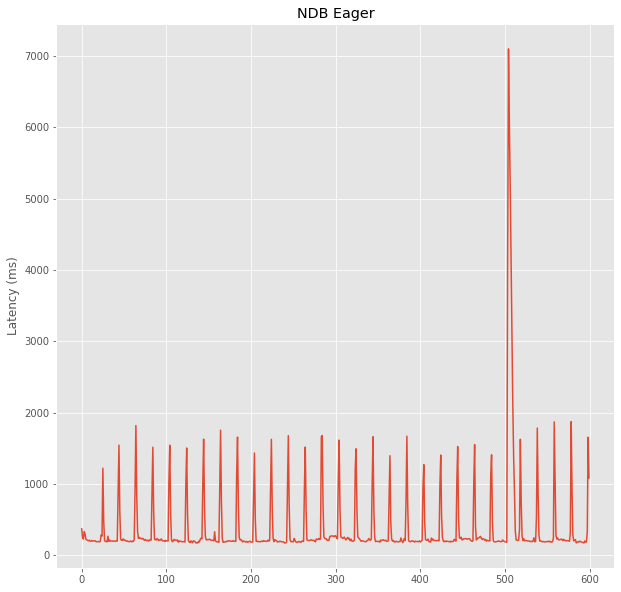

In [6]:
# Latency plot

# Set x limits from 0 to max to have plot span to the edges of the figure
ndb_max = ndb_eager_df["startTimeBucket"].max()
#plt.xlim(0, ndb_max)
#plt.xlim(430, 490)
#plt.xticks(np.arange(0, x_max, 10.0))

#plt.xlim(450, 510)

fig, axs = plt.subplots(1, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(10)

# RocksDB
p = ndb_eager_df.groupby("startTimeBucket")["latency"].mean()
axs.plot(p, label="NDB Eager")
axs.set_title("NDB Eager")
axs.set_ylabel("Latency (ms)")

# Add line when failure happens
#plt.axvline(x=444, color="grey", dashes=(10.0, 10.0))

plt.savefig("/home/christopher/Workspace/statefun-ndb-benchmark/evaluator/figures/latency")


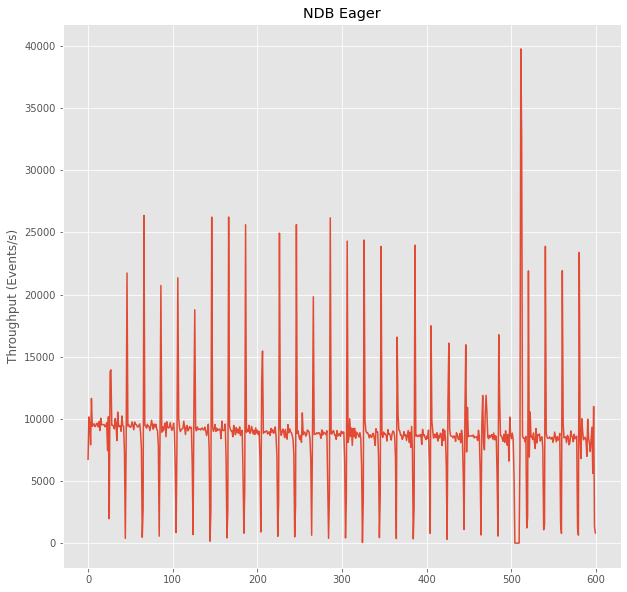

In [7]:
# Throughput plot

# Set x limits from 0 to max to have plot span to the edges of the figure
x_max = ndb_eager_df["endTimeBucket"].max()

#plt.xlim(490, 540)

# Add line when failure happens
#plt.axvline(x=444, color="grey", dashes=(10.0, 10.0))

# Data plotting

fig, axs = plt.subplots(1, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(10)


p = ndb_eager_df.groupby("endTimeBucket")["latency"].count()
p = p.reindex(range(0, x_max), fill_value=0)
axs.plot(p, label="ndb-eager")
axs.set_title("NDB Eager")
axs.set_ylabel("Throughput (Events/s)")


#p = rocksdb_full_df.groupby("endTimeBucket")["latency"].count()
#p = p.reindex(range(0, x_max), fill_value=0)
#plt.plot(p, label="rocksdb-full")
plt.savefig("/home/christopher/Workspace/statefun-ndb-benchmark/evaluator/figures/throughput.png")